In [9]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,SimpleRNN,GRU,LSTM,Dense,Flatten,TimeDistributed

In [32]:
labels = []
data = []
frame_w= 45
frame_h= 45
step = 2

In [33]:
dataset = []
data_size = 10
num_frames = 30
def creat_ball_frame(label, x, y):
  frame_next_y = y
  frame_next_x = x
  frames = []
  for i in range(num_frames):
    frame = np.zeros((frame_h, frame_w))
    cv2.circle(frame, ( frame_next_y, frame_next_x), 5, 255, -1) 
    next_x = random.randint( frame_next_x - 2,  frame_next_x + 2)
    if label==1:
       frame_next_y += step 
    else:
       frame_next_y -= step
    frames.append(frame)
  return frames

In [34]:
def data_gnerator(state_x, random_num):
  if random_num < 0.5:
    label = 0
    state_y = frame_w - 1
  else:
    label = 1
    state_y = 1
  frames = creat_ball_frame(label, state_x, state_y)
  return frames, label

In [35]:
for i in range(data_size):
  random_num = random.random()
  state_x = random.randint(2, frame_h- 2)
  data, label = data_gnerator(state_x, random_num)
  dataset.append(data)
  labels.append(label)

In [30]:
dataset = np.array(dataset)
labels = np.array(labels)
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]


frame: 1


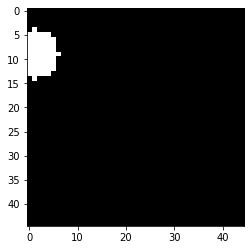



frame: 2


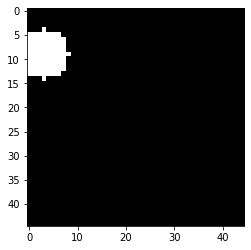



frame: 3


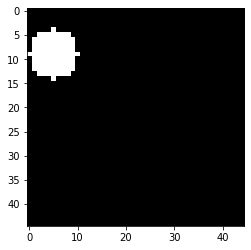



frame: 4


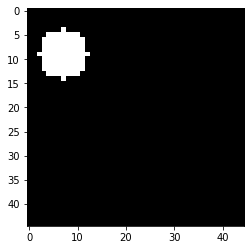



frame: 5


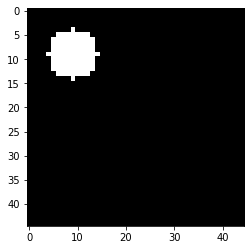



frame: 6


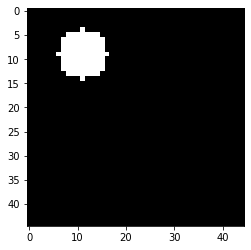



frame: 7


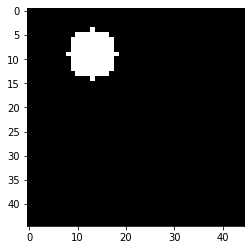



frame: 8


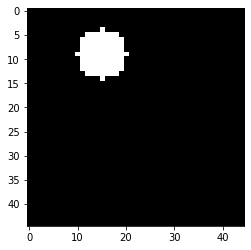



frame: 9


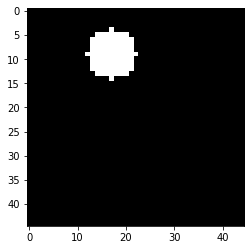



frame: 10


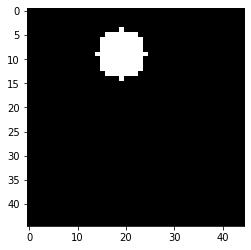



frame: 11


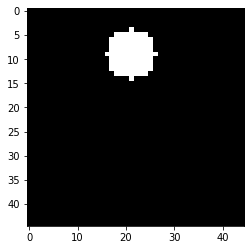



frame: 12


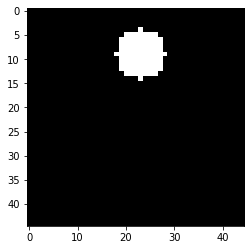



frame: 13


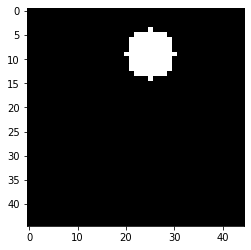



frame: 14


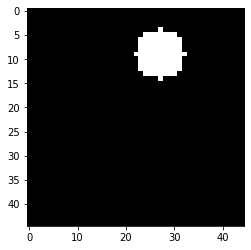



frame: 15


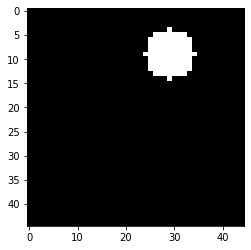



frame: 16


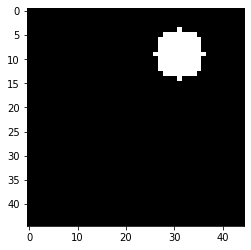



frame: 17


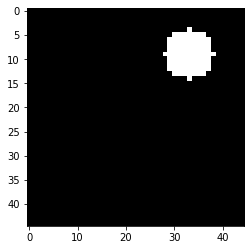



frame: 18


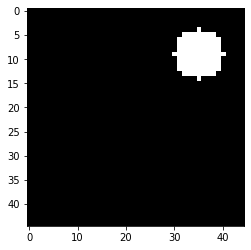



frame: 19


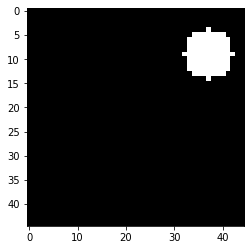



frame: 20


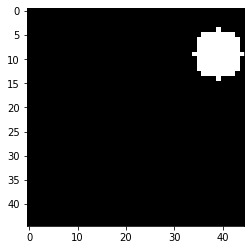



frame: 21


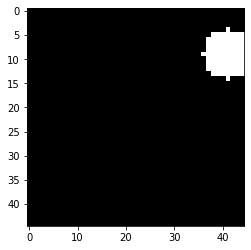



frame: 22


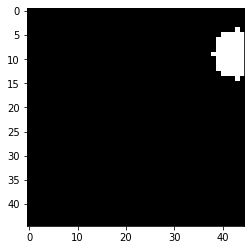



frame: 23


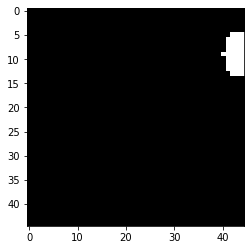



frame: 24


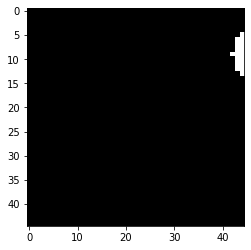



frame: 25


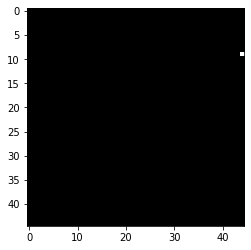



frame: 26


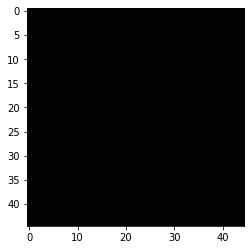



frame: 27


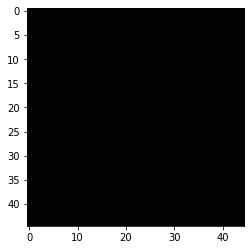



frame: 28


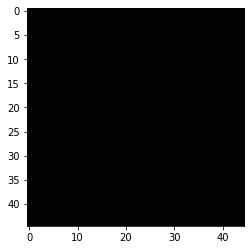



frame: 29


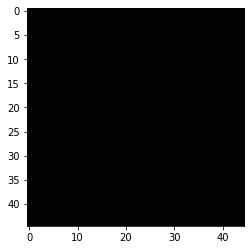



frame: 30


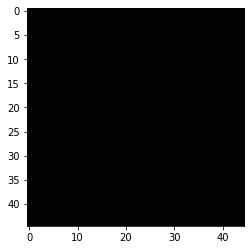

In [7]:
for frame in range(len(dataset[6, :])):
    print("frame:", frame+1)
    plt.imshow(dataset[0, frame, :, :,0], cmap='gray')
    plt.show()
    print("\n")

In [17]:
print(labels)
x_train=dataset
y_train=labels

[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


In [12]:
import tensorflow as tf

In [25]:
model=tf.keras.models.Sequential([
                                  TimeDistributed(Conv2D(2,(3,3),activation="relu", input_shape=(None,frame_w,frame_h,1))),
                                  TimeDistributed(MaxPooling2D(pool_size=(2,2)))
                                  ,TimeDistributed(Flatten()),
                                  
                                  LSTM(20),
                                  Dense(2,activation="softmax")

])

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
                                                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                                                 metrics=["accuracy"])

RNN

In [18]:
model.fit(x_train,y_train,batch_size=32,epochs=2)

Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 0.5202 - accuracy: 0.8000
Epoch 2/2
1/1 [==============================] - 0s 117ms/step - loss: 0.4608 - accuracy: 0.8000


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 43, 43, 2)    20        
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 21, 21, 2)    0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 882)          0         
 tributed)                                                       
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                18060     
                                                                 
 dense (Dense)               (None, 2)                 42        
                                                        

LSTM

In [27]:
model.fit(x_train,y_train,batch_size=32,epochs=2)

Epoch 1/2
1/1 [==============================] - 2s 2s/step - loss: 0.6916 - accuracy: 0.5000
Epoch 2/2
1/1 [==============================] - 0s 135ms/step - loss: 0.6339 - accuracy: 0.9000


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 30, 43, 43, 2)    20        
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 30, 21, 21, 2)    0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 30, 882)          0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 20)                72240     
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                      

GRU

In [23]:
model.fit(x_train,y_train,batch_size=32,epochs=2)

Epoch 1/2
1/1 [==============================] - 2s 2s/step - loss: 0.6768 - accuracy: 0.9000
Epoch 2/2
1/1 [==============================] - 0s 125ms/step - loss: 0.6646 - accuracy: 0.9000


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 30, 43, 43, 2)    20        
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 21, 21, 2)    0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 30, 882)          0         
 tributed)                                                       
                                                                 
 gru (GRU)                   (None, 20)                54240     
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                      